In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [3]:
def retta(x, m, q):
    return m*x + q

def resonance(x, x0, Q, Q_c, phi0):
    num = np.exp(1j*phi0)
    den = 1 + 2*1j*Q*(x-x0)/x0
    return abs(1 - (Q/Q_c)*(num/den))

def fit_func(x,a,b,x0,Q,Q_c,phi0):
    return retta(x,a,b)*resonance(x,x0,Q,Q_c,phi0)

def mod(I,Q):
    return np.sqrt(I**2 + Q**2)

def FWHM(x,y):
    half = max(y) / 2.
    minori = x[np.where(y < half)]
    index1 = min(minori)
    index2 = max(minori)
    return index2 - index1
    

In [4]:
raw_data = list(np.genfromtxt('Resonance02.txt'))

I = []
F = []
Q = []

for i in raw_data:
    F.append(i[0])
    I.append(i[1])
    Q.append(i[2])
I = np.array(I)
F = np.array(F)
Q = np.array(Q)

S21 = mod(I,Q)

In [15]:
width = FWHM(F,S21)
stima_x0 = float(F[np.where(S21 == min(S21))])
stima_Q = stima_x0/(2*width)
print(stima_Q)

4945.503620689655


In [6]:
stima_m = (S21[0]-S21[-1])/(F[0]-F[-1])
stima_q = S21[0] - stima_m * F[0]
stima_Q_c = 10000
stima_phi0 = 0.2

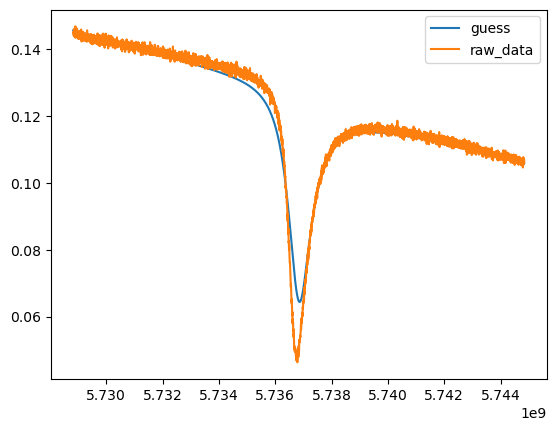

In [16]:
plt.plot(F,fit_func(F,stima_m, stima_q,stima_x0,stima_Q,stima_Q_c,stima_phi0),label='guess')
plt.plot(F,S21, label='raw_data')
plt.legend()

In [8]:
params = np.array([stima_m,stima_q,stima_x0,stima_Q, stima_Q_c,stima_phi0]) 
popt, pcov = curve_fit(fit_func,F,S21, params)

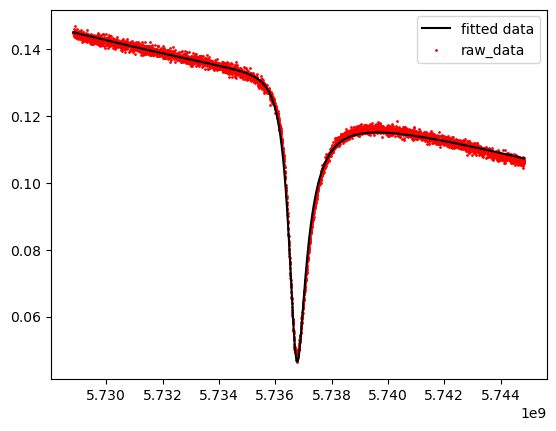

In [9]:
plt.plot(F,fit_func(F, *popt),label='fitted data', color='black')
plt.scatter(F,S21, label='raw_data', s=1, color='red')
plt.legend()

In [11]:
fitted_m = np.array([popt[0],np.diag(pcov)[0]])
fitted_q = np.array([popt[1],np.diag(pcov)[1]])
fitted_x0 = np.array([popt[2],np.diag(pcov)[2]])
fitted_Q = np.array([popt[3],np.diag(pcov)[3]])
fitted_Q_c = np.array([popt[4],np.diag(pcov)[4]])
fitted_phi0 = np.array([popt[5],np.diag(pcov)[5]])

In [14]:
print('Q_c: '+str(fitted_Q_c[0])+' +/- '+str(fitted_Q_c[1]))
print('Q  : '+str(fitted_Q[0])+' +/- '+str(fitted_Q[1]))

Q_c: 9286.42642675307 +/- 284.01507147158037
Q  : 6062.24813174814 +/- 167.89014756322766
